In [46]:
import json
import numpy as np
import pandas as pd
import requests
from joypy import joyplot
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Reading Covid-19 Data

#### INDIA

In [47]:
#URLI = "https://api.covid19india.org/data.json"
#result = requests.get(URLI).json()
#dfI = pd.DataFrame(result["cases_time_series"])
#dfI.to_excel("data.xlsx", index=False)

In [52]:
URLI = "https://api.covid19india.org/data.json"
resultI = requests.get(URLI).json()
df1 = pd.DataFrame(resultI["cases_time_series"])

In [53]:
df1.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,dateymd,totalconfirmed,totaldeceased,totalrecovered
433,126276,684,59137,7 April 2021,2021-04-07,12925994,166301,11848747
434,131878,802,61829,8 April 2021,2021-04-08,13057872,167103,11910576
435,144945,773,77263,9 April 2021,2021-04-09,13202817,167876,11987839
436,152565,838,90328,10 April 2021,2021-04-10,13355382,168714,12078167
437,169914,904,75380,11 April 2021,2021-04-11,13525296,169618,12153547


In [54]:
# setting index as dateymd and dropping date column
df1 = df1.drop(['date'], axis = 1)
df1 = df1.set_index('dateymd')
df1.index.names = [None]

In [55]:
df1.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
2021-04-07,126276,684,59137,12925994,166301,11848747
2021-04-08,131878,802,61829,13057872,167103,11910576
2021-04-09,144945,773,77263,13202817,167876,11987839
2021-04-10,152565,838,90328,13355382,168714,12078167
2021-04-11,169914,904,75380,13525296,169618,12153547


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 2020-01-30 to 2021-04-11
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dailyconfirmed  438 non-null    object
 1   dailydeceased   438 non-null    object
 2   dailyrecovered  438 non-null    object
 3   totalconfirmed  438 non-null    object
 4   totaldeceased   438 non-null    object
 5   totalrecovered  438 non-null    object
dtypes: object(6)
memory usage: 24.0+ KB


In [57]:
df1.index = pd.to_datetime(df1.index)
df1["dailyconfirmed"] = df1["dailyconfirmed"].astype(int)/1000
df1["dailydeceased"] = df1["dailydeceased"].astype(int)/1000
df1["dailyrecovered"] = df1["dailyrecovered"].astype(int)/1000
df1["totalconfirmed"] = df1["totalconfirmed"].astype(int)/1000
df1["totaldeceased"] = df1["totaldeceased"].astype(int)/1000
df1["totalrecovered"] = df1["totalrecovered"].astype(int)/1000

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 438 entries, 2020-01-30 to 2021-04-11
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dailyconfirmed  438 non-null    float64
 1   dailydeceased   438 non-null    float64
 2   dailyrecovered  438 non-null    float64
 3   totalconfirmed  438 non-null    float64
 4   totaldeceased   438 non-null    float64
 5   totalrecovered  438 non-null    float64
dtypes: float64(6)
memory usage: 24.0 KB


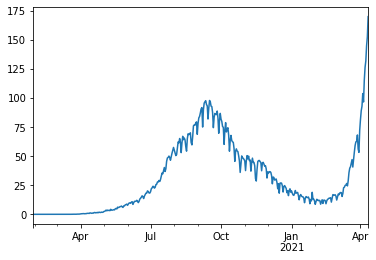

In [59]:
# some basic plot
df1['dailyconfirmed'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f10f8ce3af0>,
      dtype=object)

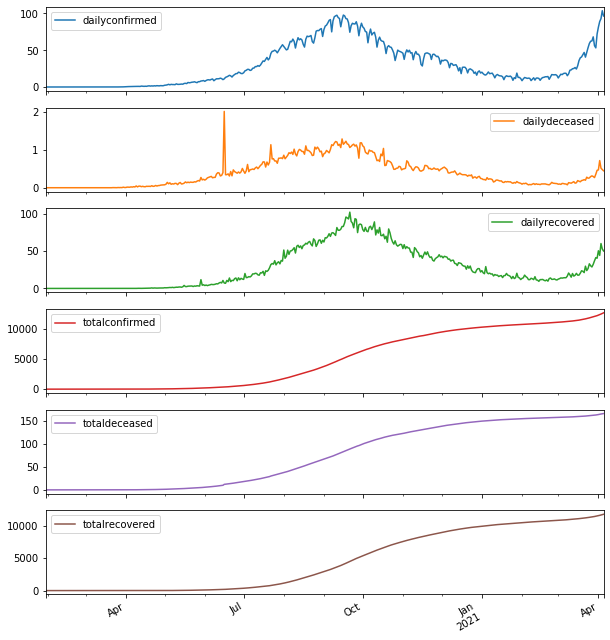

In [24]:
df1.plot(subplots=True, figsize=(10,12))

In [60]:
# comparing daily, weekly (mean) , monthly (mean) 
df_month = df1.resample("M").mean()
df_week = df1.resample("W").mean()

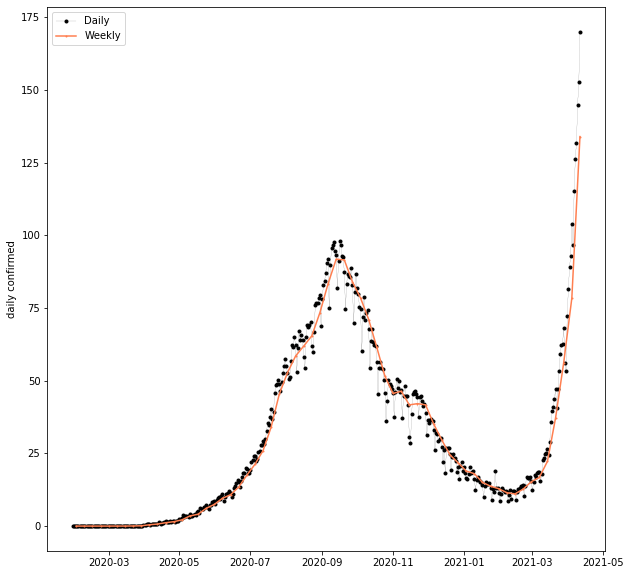

In [61]:
# daily vs weekly
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='.', linestyle='-', linewidth = 0.1, label='Daily', color='black')
ax.plot(df_week.loc[start:end, 'dailyconfirmed'], marker='.', markersize=2, linestyle='-', label='Weekly', color='coral')
#label='Monthly', color='violet'
ax.set_ylabel("daily confirmed")
ax.legend()

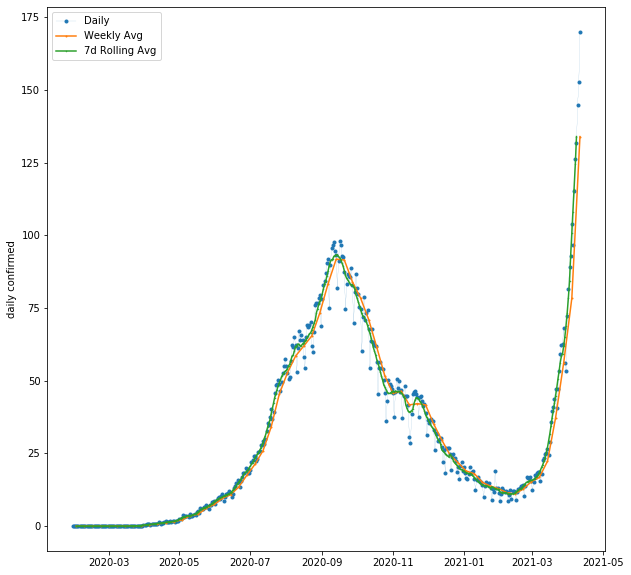

In [62]:
# 7 day rolling 
df_7d_rolling = df1.rolling(7, center=True).mean()
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
#fig =  plt.figure(figsize = (20,8), dpi = 100)
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='.', linestyle='-', 
        linewidth=0.1, label='Daily')
ax.plot(df_week.loc[start:end, 'dailyconfirmed'], marker='o', markersize=1, 
        linestyle='-', label = 'Weekly Avg')
ax.plot(df_7d_rolling.loc[start:end, 'dailyconfirmed'], marker='.', markersize=1, linestyle='-', label='7d Rolling Avg')
ax.set_ylabel('daily confirmed')
ax.legend()

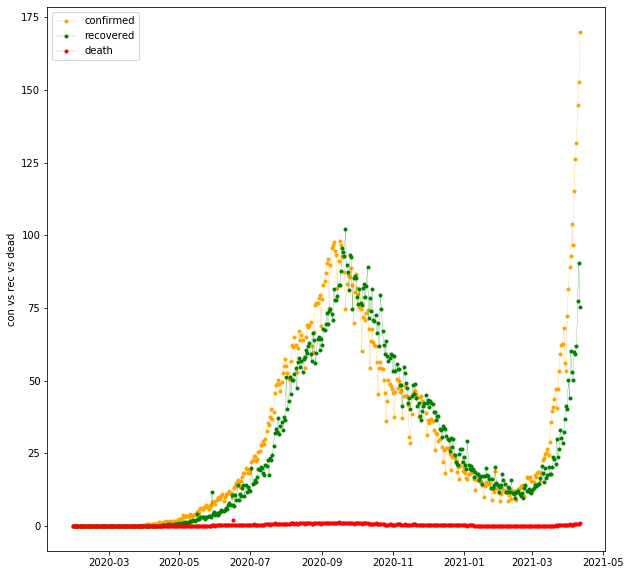

In [63]:
# daily confirmed  vs dailyrecovered
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'dailyconfirmed'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='confirmed', color='orange')
ax.plot(df1.loc[start:end, 'dailyrecovered'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='recovered', color='green')
ax.plot(df1.loc[start:end, 'dailydeceased'], marker='o', markersize=3, linestyle='-', linewidth = 0.2, label='death', color='red')
#label='Monthly', color='violet'
ax.set_ylabel("con vs rec vs dead")
ax.legend()

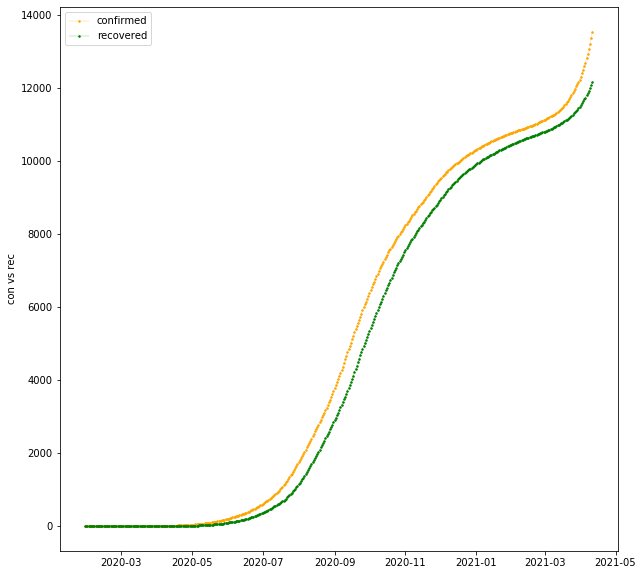

In [64]:
# total confirmed  vs dailyrecovered
start, end = '2020-01', '2021-04'
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(df1.loc[start:end, 'totalconfirmed'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='confirmed', color='orange')
ax.plot(df1.loc[start:end, 'totalrecovered'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='recovered', color='green')
#ax.plot(df1.loc[start:end, 'totaldeceased'], marker='.', markersize=3, linestyle='-', linewidth = 0.2, label='death', color='red')
#label='Monthly', color='violet'
ax.set_ylabel("con vs rec")
ax.legend()

In [ ]:
cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June','July', 'August',  'September','October', 'November', 'December'])

In [ ]:
df['Month'] = df['Month'].astype(cat_month)

# Creating a Ridgeline Plot

In [ ]:
plt.figure()

joyplot(
    data=df[['dailyconfirmed', 'Month']], 
    by='Month',
    figsize=(10, 6)
)
plt.title('Ridgeline Plot of Covid-19 Cases in India for the last 12 months', fontsize=20)
plt.show()

# Ridgeline plot for multiple variables

In [ ]:
plt.figure()

ax, fig = joyplot(
     data=df[['dailyrecovered', 'dailyconfirmed', 'Month']], 
      by='Month',
      figsize=(12, 8),
      column=['dailyrecovered', 'dailyconfirmed'],
      color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
)
plt.title('Ridgeline Plot of Covid-19 Cases and Recoveries in India for the last 3 months', fontsize=20)
plt.show()

#### WORLD

In [ ]:
URLW = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/json/"
resultw = requests.get(URLW).json()
df2 = pd.DataFrame(resultw["records"])

In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2.columns

In [ ]:
df2.continentExp.tail()